In [27]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,X,Y,LABEL
0,5,93,1
1,13,28,0
2,22,76,1
3,95,93,1
4,77,1,1


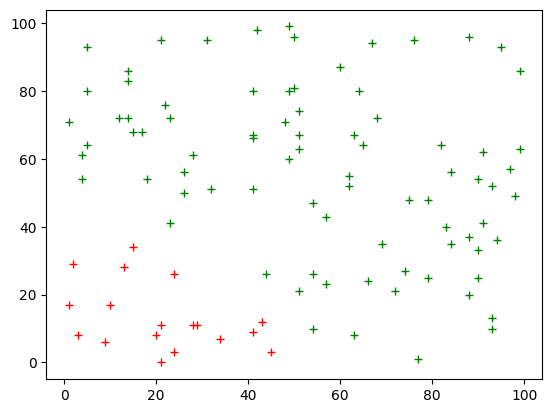

In [28]:
import matplotlib.pyplot as plt
X1 = df['X'].values.tolist()
X2 = df['Y'].values.tolist()
Y = df['LABEL'].values.tolist()
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "g+")

In [29]:
from IPython import display
import math
import numpy as np
import random
from scipy.signal import savgol_filter

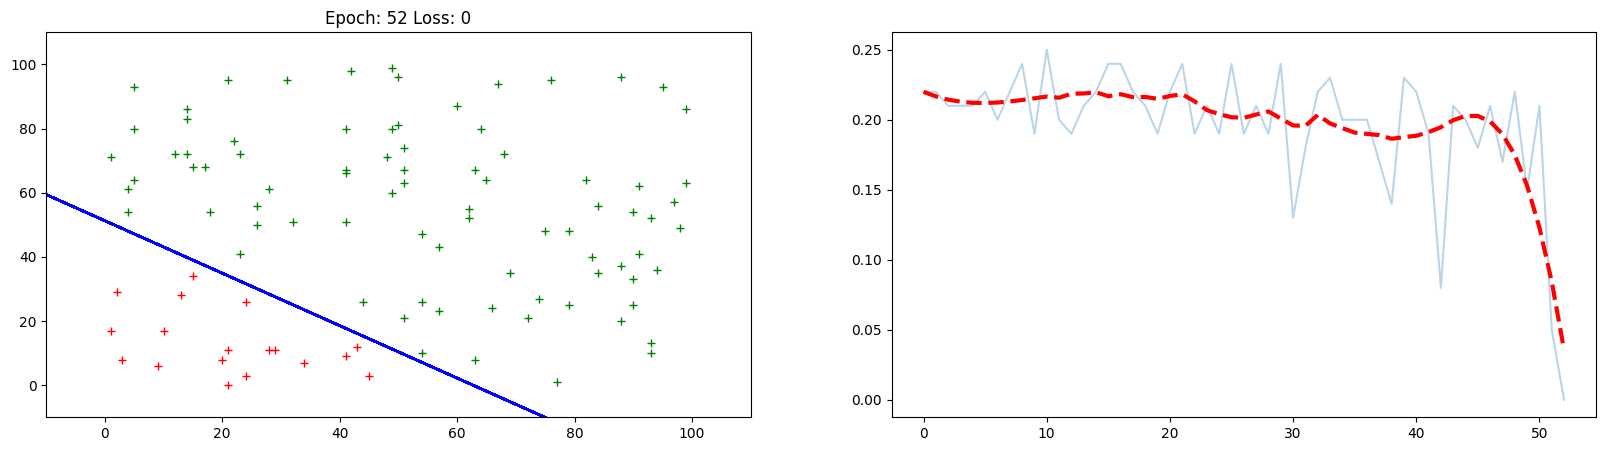

Epoch: 52 Loss: 0.0


In [30]:
W = [random.random(), random.random()]
b = random.random()

learning_rate = 0.1
theta = 0.5

epoch = 0
count = 0

loss = []

while count < len(X1):
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0] * X1[i] + W[1] * X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1
        error = Y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            W[0] += learning_rate * error * X1[i]
            W[1] += learning_rate * error * X2[i]
            b += learning_rate * error
        else:
            count += 1
    loss.append(1/len(X1) * total_error)
            
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    display.clear_output(wait=True)
    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "r+")
        else:
            plt.plot(X1[i], X2[i], "g+")
            
        plt.xlim([-10, 110])
        plt.ylim([-10, 110])
        
        xintr = (theta-b)/W[0]
        yintr = (theta-b)/W[1]
        
        slope = -yintr/xintr
        
        xx = plt.xlim()
        yeq = []
        for x in xx:
            yeq.append(slope*x+yintr)
        plt.plot(xx, yeq, 'b-')
        
    plt.title(f"Epoch: {epoch} Loss: {total_error}")
    
    plt.subplot(1, 2, 2)
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3)
        plt.plot(yhat, 'r--', lw=3)
    plt.show()
    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch += 1